<a href="https://colab.research.google.com/github/Mubarok982/DM_ML/blob/main/TUGAS_DM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# load Dataset

In [14]:
data = pd.read_csv('custome.csv')
data.head()

,CustomerID,Name,Age,Gender,Annual_Income,Spending_Score,Membership_Level,Purchase_Frequency,Churn_Status
0,CUST1000,Connor Rowland,40,Female,52777,27,Gold,5.2,0
1,CUST1001,Cameron Miles MD,28,Female,65910,84,Basic,12.2,0
2,CUST1002,Dennis Price,63,Male,56731,51,Silver,2.9,1
3,CUST1003,Jessica Jones,23,Female,40559,56,Platinum,11.1,0
4,CUST1004,Kevin Bauer,38,Male,79675,74,Basic,10.7,0


# Menampilkan ringkasa informasi Dataset

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          2000 non-null   object 
 1   Name                2000 non-null   object 
 2   Age                 2000 non-null   int64  
 3   Gender              2000 non-null   object 
 4   Annual_Income       2000 non-null   int64  
 5   Spending_Score      2000 non-null   int64  
 6   Membership_Level    2000 non-null   object 
 7   Purchase_Frequency  2000 non-null   float64
 8   Churn_Status        2000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


# Menghapus kolom Customer_ID dan Name karena memiliki terlalu banyak data unik dan tidak memiliki pola berarti dalam prediksi

In [16]:
data=data.drop(columns=['CustomerID','Name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2000 non-null   int64  
 1   Gender              2000 non-null   object 
 2   Annual_Income       2000 non-null   int64  
 3   Spending_Score      2000 non-null   int64  
 4   Membership_Level    2000 non-null   object 
 5   Purchase_Frequency  2000 non-null   float64
 6   Churn_Status        2000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB


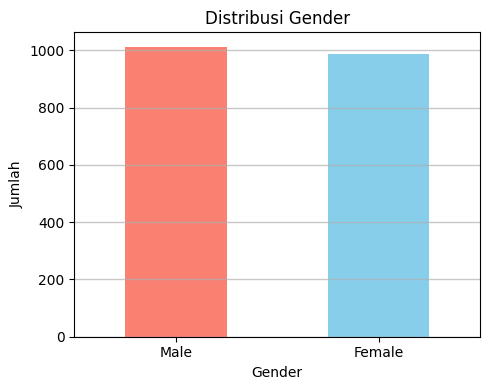

In [17]:
#Distribusi Gender
plt.figure(figsize=(5, 4))
data['Gender'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Distribusi Gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linewidth=1, alpha=0.7)
plt.tight_layout()
plt.show()

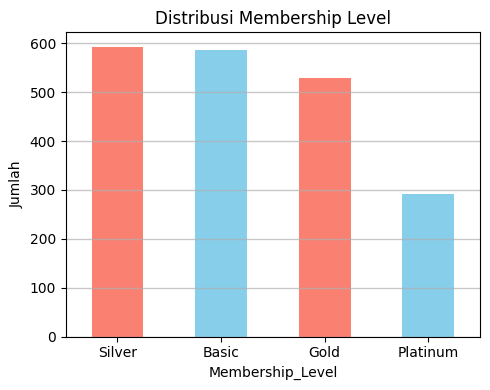

In [18]:
#Distribusi Membership Level
plt.figure(figsize=(5, 4))
data['Membership_Level'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Distribusi Membership Level')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linewidth=1, alpha=0.7)
plt.tight_layout()
plt.show()

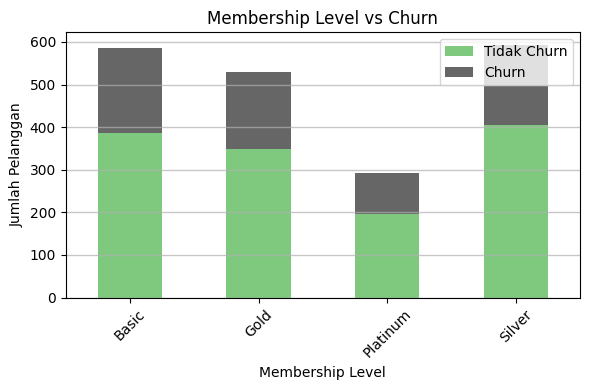

In [19]:
#Membership Level vs Churn
membership_churn = pd.crosstab(df['Membership_Level'], df['Churn_Status'])
membership_churn.plot(kind='bar', stacked=True, colormap='Accent', figsize=(6, 4))
plt.title('Membership Level vs Churn')
plt.xlabel('Membership Level')
plt.ylabel('Jumlah Pelanggan')
plt.legend(['Tidak Churn', 'Churn'])
plt.xticks(rotation=45)
plt.grid(axis='y', linewidth=1, alpha=0.7)
plt.tight_layout()
plt.show()

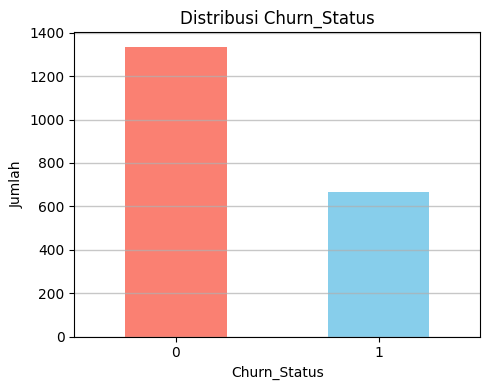

In [20]:
#Distribusi Churn_Status
plt.figure(figsize=(5, 4))
data['Churn_Status'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Distribusi Churn_Status')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linewidth=1, alpha=0.7)
plt.tight_layout()
plt.show()

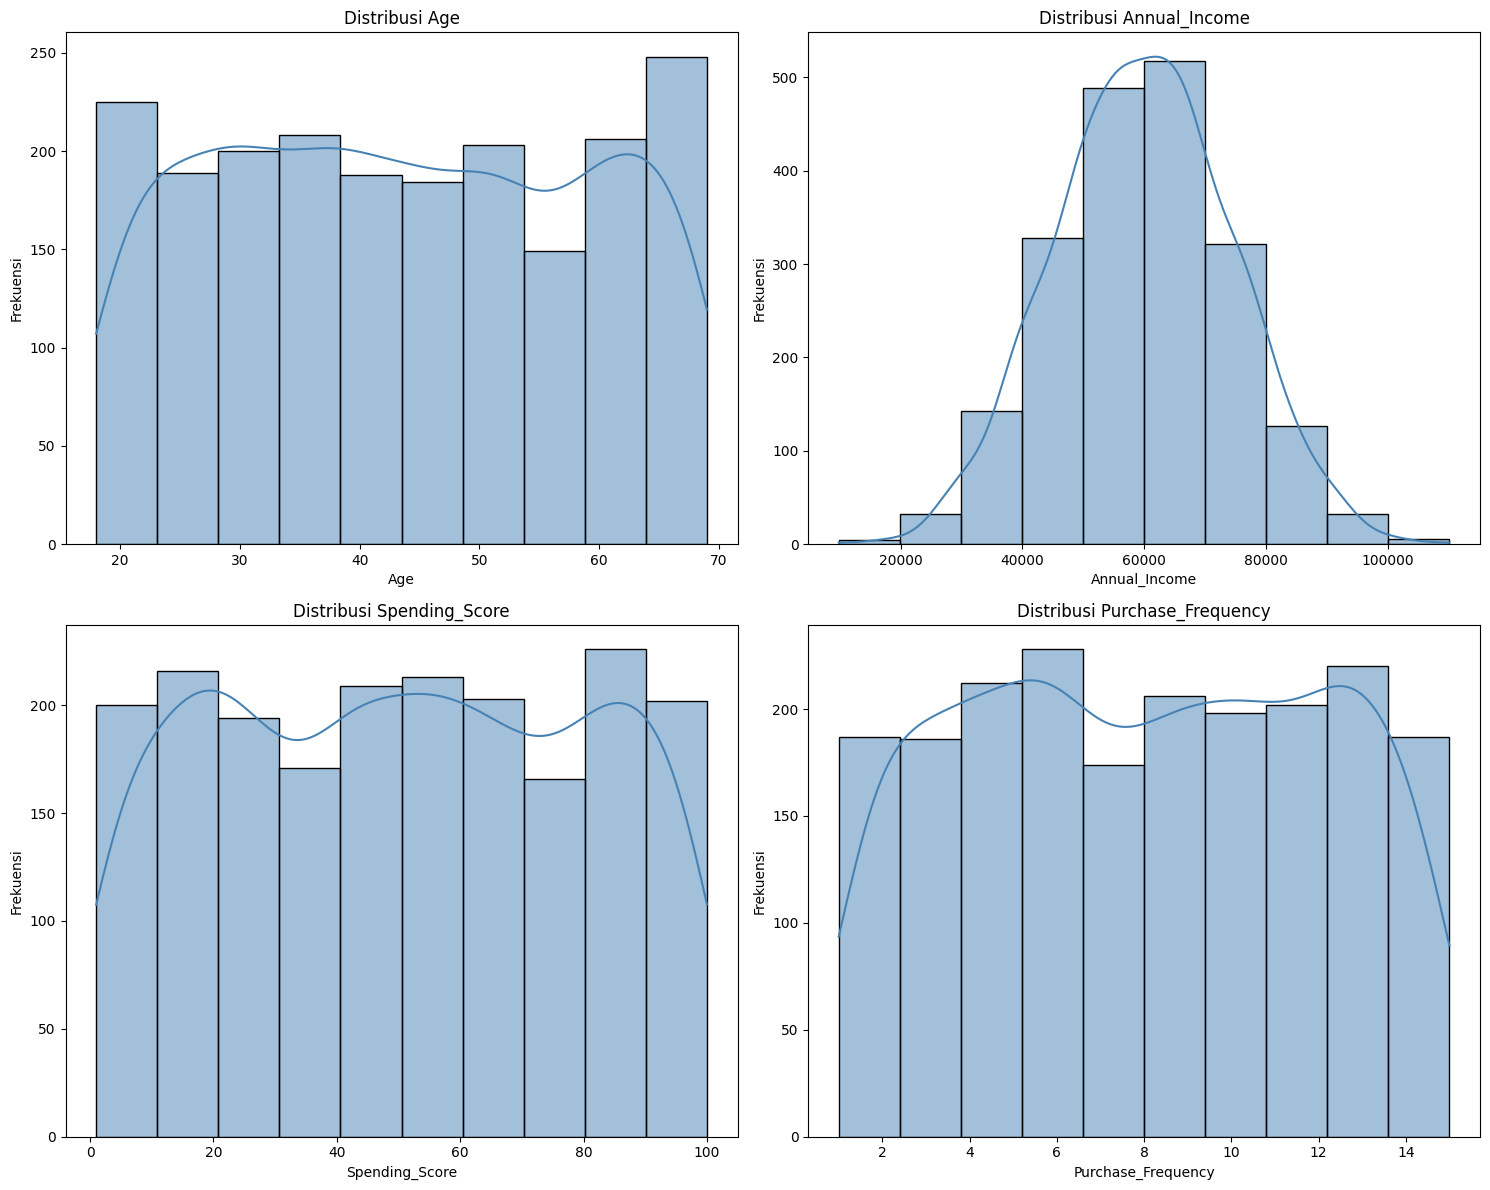

In [21]:
# Kolom numerik
numeric_columns = ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency']

# Ukuran grafik
plt.figure(figsize=(15, 12))

# Buat histogram per fitur
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, bins=10, color='steelblue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Preparasi Data

In [29]:
# 1. Encoding kolom kategorikal (ubah string ke numerik)
data_encoded = pd.get_dummies(data, drop_first=True)

# 2. Pisahkan fitur dan target
X = data_encoded.drop(columns='Churn_Status')
y = data_encoded['Churn_Status']

# 3. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Bagi data menjadi data latih dan data uji (rasio 80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Latih Model

In [30]:
# Latih model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

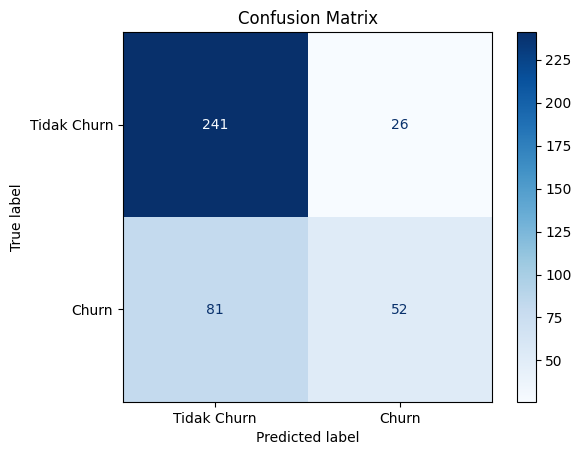

Akurasi: 0.7325

Classification Report:
               precision    recall  f1-score   support

 Tidak Churn       0.75      0.90      0.82       267
       Churn       0.67      0.39      0.49       133

    accuracy                           0.73       400
   macro avg       0.71      0.65      0.66       400
weighted avg       0.72      0.73      0.71       400



In [31]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Evaluasi tambahan
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Tidak Churn", "Churn"]))

# Hyper Parameter Tuning

In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Model terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


# Mengambil koefisien model terbaik

In [ ]:
# Ambil koefisien model terbaik
coef = best_model.coef_[0]

# Pasangkan dengan nama fitur
features_coef = pd.Series(coef, index=X.columns)

# Fitur dengan koefisien tidak nol (artinya berkontribusi pada model)
important_features = features_coef[features_coef != 0].sort_values(key=abs, ascending=False)

print("Fitur penting dan koefisiennya:")
print(important_features)

Fitur penting dan koefisiennya:
Purchase_Frequency   -0.344384
Spending_Score       -0.278242
dtype: float64


# Melatih model hanya dengan fitur penting

In [39]:
# Pilih fitur penting saja
X_important = data[['Purchase_Frequency', 'Spending_Score']]
y = data['Churn_Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Logistic Regression dengan hyperparameter terbaik sebelumnya
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

# Evaluasi model dengan fitur terbaik


Confusion Matrix:
[[254  13]
 [ 81  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       267
           1       0.80      0.39      0.53       133

    accuracy                           0.77       400
   macro avg       0.78      0.67      0.68       400
weighted avg       0.77      0.77      0.74       400



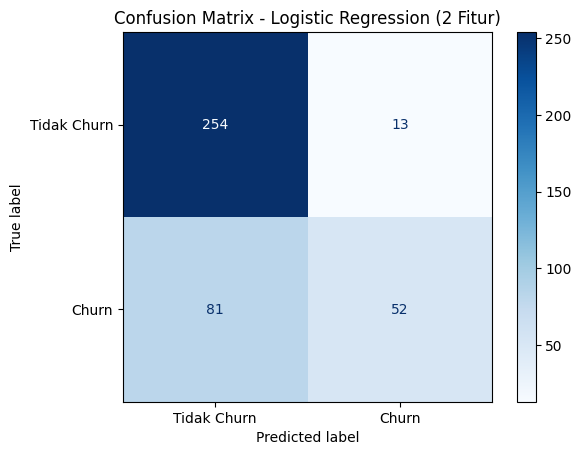

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (2 Fitur)')
plt.grid(False)
plt.show()